In [1]:
import numpy as np
import minvar_whitening as mvw
import matplotlib.pyplot as plt
from scipy.linalg import qr, fractional_matrix_power
import seaborn as sns

## Simple example

Mahalanobis whitening takes a correlated dataset and removes correlations between variables and standardizes each variable. We create a 10-dimensional dataset with $N$ observations $X \in \mathbb{R}^{d \times N}$ below with empirical covariance matrix $\Sigma$ and empirical mean $\mu$, and standardize this dataset using Mahalanobis whitening:

$$Y = \Sigma^{-1/2}(X - \mu)$$.

In [2]:
#make a correlated covariance matrix by rotating a diagonal 
#matrix using an orthogonal matrix, found using QR decomposition
np.random.seed(1)
d = 5

random_matrix = np.random.rand(d, d)
true_cov = random_matrix.T @ random_matrix

In [3]:
true_mean = np.zeros(d)
N = 200

X = np.real(np.random.multivariate_normal(true_mean, true_cov, N)).T

In [4]:
emp_cov = np.cov(X)
emp_mean = np.mean(X, axis = 1)[:, np.newaxis]

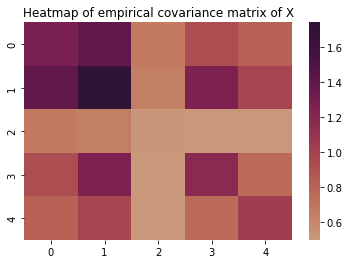

In [5]:
fig, ax = plt.subplots()

ax = sns.heatmap(emp_cov, cmap = 'twilight_shifted', center = 0)
ax.set_title('Heatmap of empirical covariance matrix of X');

In [6]:
emp_cov_inv = np.linalg.inv(emp_cov)
emp_cov_inv_sqrt = fractional_matrix_power(emp_cov_inv, 1/2)

Y = emp_cov_inv_sqrt @ (X - emp_mean)

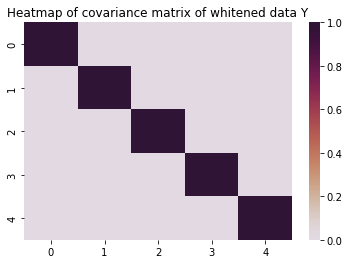

In [7]:
fig, ax = plt.subplots()

ax = sns.heatmap(np.cov(Y), cmap = 'twilight_shifted', center=0)
ax.set_title('Heatmap of covariance matrix of whitened data Y');

In [8]:
print('Eigenvalues of the whitened data Y:', np.linalg.eigvals(np.cov(Y)))

Eigenvalues of the whitened data Y: [1. 1. 1. 1. 1.]


## Degenerate example

### Mahalanobis whitening
The above example shows that using Mahalanobis whitening successfully transforms the dataset to a new dataset with the identity matrix as its covariance matrix. However, if the covariance matrix of the dataset $X$ is singular, the inverse covariance matrix is not available. 

In [9]:
#Perform the same as above but with a degenerate covariance matrix
degenerate_true_cov = np.random.rand(d, d)
degenerate_true_cov[:, -1] = np.zeros(d)
degenerate_true_cov = degenerate_true_cov.T @ degenerate_true_cov

true_mean = np.zeros(d)
N = 200

degenerate_X = np.real(np.random.multivariate_normal(true_mean, degenerate_true_cov, N)).T
degenerate_emp_cov = np.cov(degenerate_X)
degenerate_emp_mean = np.mean(degenerate_X, axis = 1)[:, np.newaxis]

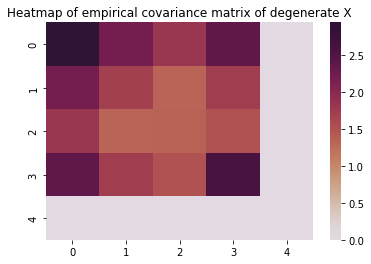

In [10]:
fig, ax = plt.subplots()

ax = sns.heatmap(degenerate_emp_cov, cmap = 'twilight_shifted', center = 0)
ax.set_title('Heatmap of empirical covariance matrix of degenerate X');

In [11]:
degenerate_emp_cov_inv = np.linalg.inv(degenerate_emp_cov)
degenerate_emp_cov_inv_sqrt = fractional_matrix_power(degenerate_emp_cov_inv, 1/2)

degenerate_Y = degenerate_emp_cov_inv_sqrt @ (degenerate_X - degenerate_emp_mean)

LinAlgError: Singular matrix

### Minimal Variance Whitening 
We now use the minimal variance whitening method to whiten the above degenerate dataset. 

In [12]:
k = 4 #max value of k = rank of data, which is 4 here.

A_k = mvw.A_matrix(degenerate_emp_cov, k)
MVW_X = A_k @ (degenerate_X - degenerate_emp_mean) * mvw.adjustment_value(degenerate_emp_cov, k) 
#Adjustment value is needed when value is low rank. See publication for more information.

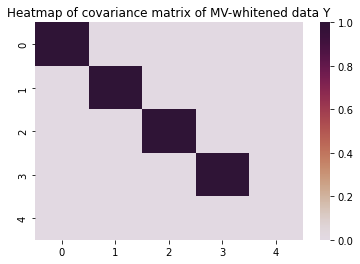

In [13]:
fig, ax = plt.subplots()

ax = sns.heatmap(np.real(np.cov(MVW_X)), cmap = 'twilight_shifted', center=0)
ax.set_title('Heatmap of covariance matrix of MV-whitened data Y');

In [14]:
print('Eigenvalues of the whitened degenerate data Y using the minimal-variance whitening:',
     np.round(np.linalg.eigvals(np.cov(MVW_X)), 5))

Eigenvalues of the whitened degenerate data Y using the minimal-variance whitening: [1. 1. 1. 1. 0.]
